# Análisis del riesgo de incumplimiento de los prestatarios

Tu proyecto consiste en preparar un informe para la división de préstamos de un banco. Deberás averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes.

Tu informe se tendrá en cuenta al crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utiliza para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

[En este cuaderno se te brindan pistas, breves instrucciones y sugerencias para pensar. No los ignores, ya que están diseñados para equiparte con la estructura del proyecto y te ayudarán a analizar lo que estás haciendo en un nivel más profundo. Antes de enviar tu proyecto, asegúrate de eliminar todas las sugerencias y descripciones que se te hayan proporcionado. Más bien, haz que este informe parezca como si se lo estuvieras enviando a tus compañeros de equipo para demostrar tus hallazgos: ¡no deben saber que recibiste ayuda externa de nuestra parte! Para ayudarte, hemos colocado las pistas que debes eliminar entre corchetes.]

[Antes de sumergirte en el análisis de tus datos, explica los propósitos del proyecto y las hipótesis que vas a evaluar.]

## Abre el archivo de datos y mira la información general. 

[Empieza con la importación de las librerías y la carga de los datos. Es posible que te des cuenta de que necesitas librerías adicionales a medida que avanzas, lo cual es totalmente normal, solo asegúrate de actualizar esta sección cuando lo hagas.]

In [1]:
import pandas as pd # Cargar todas las librerías
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv', sep=',')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv', sep=',')

## Ejercicio 1. Exploración de datos

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo

[Ahora vamos a explorar nuestros datos. Querrás ver cuántas columnas y filas hay, observa algunas filas para identificar posibles problemas con los datos.]

In [2]:
# Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos

df.shape

(21525, 12)

In [3]:
# vamos a mostrar las primeras filas N

df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


[Describe lo que ves y notas en tu muestra de datos mostrada en la pantalla. ¿Existe algún problema que pueda necesitar investigación y cambios adicionales?]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Si, existe un problema, en la data de `days_employed` la mayoria de los valores son negativos, pude tambien apreciar que education hay informacion en minuscula, en mayuscula, con mayuscula al inicio y luego las demas letras en minuscula, aparte de signos de puntuacion como los apostrofes, todos estos pequeños detalles tendran que ser corregidos para poder utilizar esa data mas adelante.
</div>

In [4]:
# Obtener información sobre los datos

df.info

<bound method DataFrame.info of        children  days_employed  dob_years            education  education_id  \
0             1   -8437.673028         42    bachelor's degree             0   
1             1   -4024.803754         36  secondary education             1   
2             0   -5623.422610         33  Secondary Education             1   
3             3   -4124.747207         32  secondary education             1   
4             0  340266.072047         53  secondary education             1   
...         ...            ...        ...                  ...           ...   
21520         1   -4529.316663         43  secondary education             1   
21521         0  343937.404131         67  secondary education             1   
21522         1   -2113.346888         38  secondary education             1   
21523         3   -3112.481705         38  secondary education             1   
21524         2   -1984.507589         40  secondary education             1   

       

[¿Hay valores ausentes en todas las columnas o solo en algunas? Describe brevemente lo que ves en 1 o 2 oraciones.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Si, hay valores ausentes, pero solo en algunas columnas.
</div>

In [5]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos

df_filtrado = df[df.isnull().any(axis=1)]
df_filtrado

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


[¿Los valores ausentes parecen simétricos? ¿Podemos estar seguros de esta suposición? Explica brevemente tus pensamientos en esta sección. Probablemente desees realizar investigaciones adicionales y contar los valores ausentes en todas las filas con valores ausentes para confirmar que las muestras que faltan son del mismo tamaño.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
1) Los valores son asimetricos
2) Si, ya que tenemos mas filas que columnas.
3) Seria bueno hacer la investigacion de los valores ausentes, pero entiendo que eso no variaria las observaciones de simetria del dataframe ofrecido.
</div>

In [6]:
# Aplicar múltiples condiciones para filtrar datos y contar filas en la tabla filtrada

condiciones = (df['children'] >= 3) & (df['total_income'] >= 100) & (df['dob_years'] <= 40)
df_filtrado = df[condiciones]

# Contar filas en la tabla filtrada
num_filas_filtradas = len(df_filtrado)

# Mostrar la tabla filtrada y el número de filas
print("\nTabla filtrada con las siguientes condiciones:")
print(df_filtrado)
"Número de filas en la tabla filtrada:", num_filas_filtradas


Tabla filtrada con las siguientes condiciones:
       children  days_employed  dob_years            education  education_id  \
3             3   -4124.747207         32  secondary education             1   
270           3   -1872.663186          0  secondary education             1   
294           4   -2220.384765         36    bachelor's degree             0   
352           3   -2949.422637         35  secondary education             1   
606          20    -880.221113         21  secondary education             1   
...         ...            ...        ...                  ...           ...   
21333         4   -2927.000229         38  secondary education             1   
21470         3   -1555.901115         38    bachelor's degree             0   
21484         3    -968.718123         35  secondary education             1   
21491        20    -173.954460         27  secondary education             1   
21523         3   -3112.481705         38  secondary education          

('Número de filas en la tabla filtrada:', 290)

**Conclusión intermedia**

[¿El número de filas en la tabla filtrada coincide con el número de valores ausentes? ¿Qué conclusión podemos sacar de esto?]

[Calcula el porcentaje de los valores ausentes en comparación con el conjunto de datos completo. ¿Se trata de una porción de datos considerablemente grande? Si es así, es posible que quieras completar los valores ausentes. Para hacer eso, primero debemos definir si los datos ausentes podrían deberse a la característica específica del cliente, como el tipo de empleo u otra cosa. Tendrás que decidir qué característica, según *tú*, podría ser la razón. En segundo lugar, debemos verificar si los valores ausentes dependen de alguna manera del valor de otros indicadores con las columnas con características de clientes, específicas e identificadas.]

[Explica tus próximos pasos y cómo se correlacionan con las conclusiones que has hecho hasta ahora.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Agregare un paso extra antes de proceder, para saber el porcentaje de valores ausentes y asi tener mejor idea de que decision tomar mas adelante.
</div>

In [7]:
# Aca calcule el porcentaje de los valores ausentes en comparacion con el conjunto de datos completos

num_total_celdas = df.size
num_valores_ausentes = df.isnull().sum().sum()

porcentaje_valores_ausentes = (num_valores_ausentes / num_total_celdas) * 100

f"Porcentaje de valores ausentes en el conjunto de datos: {porcentaje_valores_ausentes:.2f}%"

'Porcentaje de valores ausentes en el conjunto de datos: 1.68%'

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
1) El numero de filas no coincide con el numero de valores ausentes.
2) Como el numero de valores ausentes no es tan significativo, teniendo en cuenta que tenemos una tabla asimetrica donde el numero de columnas no se corresponde con el numero de filas y viendo que la porcion de datos ausentes esta mas marcada en columnas especificas, hay que tomar accion sobre ellos (los valores ausentes)
</div>

In [8]:
# Vamos a investigar a los clientes que no tienen datos sobre la característica identificada y la columna con los valores ausentes

# Contar la cantidad de valores nulos en cada columna del DataFrame
nulos_por_columna = df.isnull().sum()

# Mostrar el número total de valores nulos en cada columna con su respectivo nombre de columna
print("Número total de valores nulos en cada columna:")
for columna, cantidad_nulos in nulos_por_columna.iteritems():
    print(f"{columna}: {cantidad_nulos}")

Número total de valores nulos en cada columna:
children: 0
days_employed: 2174
dob_years: 0
education: 0
education_id: 0
family_status: 0
family_status_id: 0
gender: 0
income_type: 0
debt: 0
total_income: 2174
purpose: 0


In [9]:
# Comprobación de la distribución

columnas_numericas = df.select_dtypes(include='number').columns

for columna in columnas_numericas:
    asimetria = df[columna].skew()
    if asimetria > 0:
        print(f"La variable '{columna}' es asimétrica positiva.")
    elif asimetria < 0:
        print(f"La variable '{columna}' es asimétrica negativa.")
    else:
        f"La variable '{columna}' es simétrica."

La variable 'children' es asimétrica positiva.
La variable 'days_employed' es asimétrica positiva.
La variable 'dob_years' es asimétrica positiva.
La variable 'education_id' es asimétrica positiva.
La variable 'family_status_id' es asimétrica positiva.
La variable 'debt' es asimétrica positiva.
La variable 'total_income' es asimétrica positiva.


Describe aquí tus hallazgos.]

**Posibles razones por las que hay valores ausentes en los datos**

[Propón tus ideas sobre por qué crees que los valores pueden estar ausentes. ¿Crees que están ausentes al azar o hay algún patrón?]

[Empecemos a comprobar si los valores ausentes son aleatorios.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
1) Segun se puede observar la distribucion es asimetrica positiva, digase que no es equitativa.
2) Mi parecer sobre la causa de la ausencia de datos es que probablemente los clientes de manera deliberada omitieron esta informacion, ya que como es el 1.68% de la data que esta ausente, dificilmente seria tan significativa como para dañar la muestra.
3) No creo que la data este ausente al azar.
</div>

In [10]:
# Comprobando la distribución en el conjunto de datos entero

asimetria_total = df.skew().mean()

if asimetria_total > 0:
    print("El conjunto de datos tiene asimetría positiva.")
elif asimetria_total < 0:
    print("El conjunto de datos tiene asimetría negativa.")
else:
    "El conjunto de datos es simétrico."

El conjunto de datos tiene asimetría positiva.


**Conclusión intermedia**

[¿Es similar la distribución en el conjunto de datos original a la distribución de la tabla filtrada? ¿Qué significa eso para nosotros?]

[Si crees que aún no podemos llegar a ninguna conclusión, investiguemos más a fondo nuestro conjunto de datos. Pensemos en otras razones que podrían llevar a la ausencia de datos y verifiquemos si podemos encontrar algún patrón que nos haga pensar que los valores ausentes no son aleatorios. Ya que es tu trabajo, esta sección es opcional.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
1) Si, la distribucion es similar en el conjunto de datos original y en la tabla filtrada.
2) Si la distribución de la tabla filtrada es muy diferente a la del conjunto de datos original, entonces los resultados obtenidos a partir de la tabla filtrada podrían ser engañosos o incorrectos, entonces, como son similares, se pueden utilizar sin problemas.
</div>

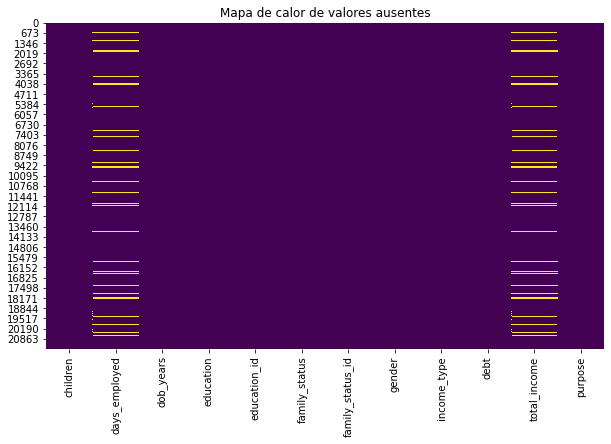

In [11]:
# Comprueba otras razones y patrones que podrían llevar a valores ausentes

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores ausentes')
plt.show()

**Conclusión intermedia**

[¿Podemos finalmente confirmar que los valores ausentes son accidentales? Verifica cualquier otra cosa que creas que podría ser importante aquí.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Al parecer los valores ausentes si son accidentales, pero hare una ultima comprobacion comparando los datos con otro tipo de grafica con diferente enfoque, para tener constancia de la realidad de los hechos.
</div>

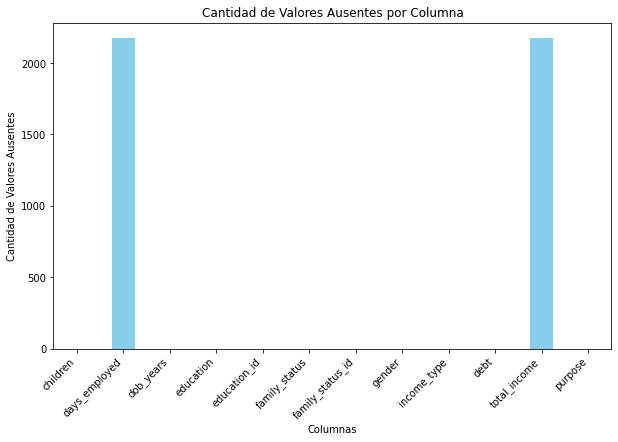

In [12]:
# Comprobación de otros patrones: explica cuáles

valores_ausentes = df.isnull().sum()

# Graficar la cantidad de valores nulos por columna en un gráfico de barras
plt.figure(figsize=(10, 6))
valores_ausentes.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Valores Ausentes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Ausentes')
plt.xticks(rotation=45, ha='right')
plt.show()

**Conclusiones**

[¿Encontraste algunos patrones? ¿Cómo llegaste a esta conclusión?]

[Explica cómo abordarás los valores ausentes. Ten en cuenta las categorías en las que faltan valores.]

[Planifica brevemente tus próximos pasos en la transformación de datos. Probablemente tendrás que abordar diferentes tipos de problemas: duplicados, diferentes registros, artefactos incorrectos y valores ausentes.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
1) Si, hay patrones visibles, como llegue a esa conclusion? bueno, es simple, confrontando la grafica de la comprobacion de patrones que esta antes de las `CONCLUSIONES` y la grafica del mapa de calor que esta encima, podriamos decir que en las columnas 'days_employed' y  'total_income' es donde solamente existen valores ausentes.
2) En la planificacion entiendo que tendre que lidiar directamente con esos valores ausentes, trabajar con los duplicados en otras columnas, problemas de registro en la data, para luego de limpiar la data, si usarla como una data representativa real de lo que se quiere investigar en el proyecto.
</div>

## Transformación de datos

[Repasemos cada columna para ver qué problemas podemos tener en ellas.]

[Comienza con la eliminación de duplicados y la corrección de la información educativa si es necesario.]

In [13]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente

# Ver todos los valores únicos en la columna de educación
valores_educacion_unicos = df['education'].unique()

# Mostrar los valores únicos y su cantidad
print("\nValores únicos en la columna de educación:")
for valor in valores_educacion_unicos:
    print("-", valor)

# Contar la cantidad de apariciones de cada valor en la columna de educación
conteo_valores_educacion = df['education'].value_counts()

# Mostrar el conteo de cada valor
print("\nConteo de valores en la columna de educación:")
conteo_valores_educacion


Valores únicos en la columna de educación:
- bachelor's degree
- secondary education
- Secondary Education
- SECONDARY EDUCATION
- BACHELOR'S DEGREE
- some college
- primary education
- Bachelor's Degree
- SOME COLLEGE
- Some College
- PRIMARY EDUCATION
- Primary Education
- Graduate Degree
- GRADUATE DEGREE
- graduate degree

Conteo de valores en la columna de educación:


secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [14]:
# Arregla los registros si es necesario

df['education'] = df['education'].str.lower().str.replace('[^\w\s]', '', regex=False)

In [15]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido

# Verificar los valores únicos después de la corrección
valores_educacion_unicos = df['education'].unique()

# Mostrar los valores únicos después de la corrección
print("\nValores únicos en la columna de educación después de la corrección:")
for valor in valores_educacion_unicos:
    print("-", valor)


Valores únicos en la columna de educación después de la corrección:
- bachelor's degree
- secondary education
- some college
- primary education
- graduate degree


[Comprueba los datos de la columna `children`]

In [16]:
# Veamos la distribución de los valores en la columna `children`

# Ver todos los valores únicos en la columna `children`
valores_unicos_en_children = df['children'].unique()

# Mostrar los valores únicos y su cantidad
print("\nValores únicos en la columna children:")
for valor in valores_unicos_en_children:
    print("-", valor)

# Contar la cantidad de apariciones de cada valor en la columna `children`
conteo_valores_children = df['children'].value_counts()

# Mostrar el conteo de cada valor
print("\nConteo de valores en la columna children:")
conteo_valores_children


Valores únicos en la columna children:
- 1
- 0
- 3
- 2
- -1
- 4
- 20
- 5

Conteo de valores en la columna children:


 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

[¿Hay cosas extrañas en esta columna? Si es así, ¿cuál es el porcentaje de datos problemáticos? ¿Cómo es posible que hayan ocurrido? Toma una decisión sobre lo que harás con estos datos y explica tu razonamiento.]

In [17]:
# Calcular el conteo de valores -1 y 20 en la columna "children"
conteo_problemas = df['children'].isin([-1, 20]).sum()

# Calcular el porcentaje de datos problemáticos en la columna "children"
porcentaje_problemas = (conteo_problemas / len(df['children'])) * 100

# Mostrar el resultado del porcentaje de datos problemáticos
"Porcentaje de datos problemáticos en la columna 'children': {:.2f}%".format(porcentaje_problemas)

"Porcentaje de datos problemáticos en la columna 'children': 0.57%"

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
1) Si, hay anomalias en esta columna.
2) El porcentaje de datos problematicos es un `0.57%` 
3) Esto pudo deberse a errores al llenar el formulario, de parte de los clientes
4) Mi decision seria sustituir estos datos por la mediana, ya que no hara una diferencia representativa, porque son menos del 1% de la data total.
</div>

In [18]:
# [arregla los datos según tu decisión]

# Calcular la mediana de la columna "children" excluyendo los valores -1 y 20
mediana_children = df.loc[~df['children'].isin([-1, 20]), 'children'].median()

# Reemplazar los valores problemáticos (-1 y 20) por la mediana calculada
df.loc[df['children'] == -1, 'children'] = mediana_children
df.loc[df['children'] == 20, 'children'] = mediana_children

# Convertir los valores en la columna "children" a enteros
df['children'] = df['children'].astype(int)

# Verificar los valores únicos después de la corrección
valores_children_unicos = df['children'].unique()

# Mostrar los valores únicos después de la corrección
print("\nValores únicos en la columna 'children' después de la corrección:")
for valor in valores_children_unicos:
    print("-", valor)


Valores únicos en la columna 'children' después de la corrección:
- 1
- 0
- 3
- 2
- 4
- 5


In [19]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado

df['children'].value_counts()

0    14272
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

[Comprueba los datos en la columna `days_employed`. En primer lugar, piensa qué tipo de problemas podría haber, qué posiblemente desees comprobar y cómo lo harás.]

In [20]:
# Encuentra datos problemáticos en `days_employed`, si existen, y calcula el porcentaje

# Verificar los valores únicos en la columna 'days_employed'
valores_days_employed_unicos = df['days_employed'].unique()

# Identificar valores problemáticos en la columna 'days_employed'
datos_problematicos = df[(df['days_employed'] < 0) | (df['days_employed'] > 36500) | df['days_employed'].isnull()]

# Calcular el porcentaje de datos problemáticos en la columna 'days_employed'
porcentaje_datos_problematicos = (len(datos_problematicos) / len(df['days_employed'])) * 100

# Mostrar el porcentaje de datos problemáticos
"Porcentaje de datos problemáticos en la columna 'days_employed': {:.2f}%".format(porcentaje_datos_problematicos)

"Porcentaje de datos problemáticos en la columna 'days_employed': 100.00%"

[Si la cantidad de datos problemáticos es alta, podría deberse a problemas técnicos. Puede que queramos proponer la razón más obvia por la que podría haber sucedido y cuáles podrían haber sido los datos correctos, ya que no podemos eliminar estas filas problemáticas.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca, como todos los datos o son nulos o superiores a 36500, o son negativos, lo que haremos sera convertir primero todos los datos a positivos, luego trabajaremos los datos superiores a 20000 usando la mediana de la columna, y ya que no eran tantos los superiores a 20000 todo deberia funcionar adecuadamente.
</div>

In [21]:
# Aborda los valores problemáticos, si existen.

# Convertir los valores negativos de 'days_employed' a positivos
df['days_employed'] = df['days_employed'].abs()

# Sustituir los valores superiores a 20000 por la mediana de 'days_employed'
mediana_days_employed = df.loc[df['days_employed'] <= 20000, 'days_employed'].median()
df['days_employed'] = df['days_employed'].apply(lambda x: mediana_days_employed if x > 20000 else x)

In [22]:
# Comprueba el resultado - asegúrate de que esté arreglado

df['days_employed'].value_counts()

1630.019381    3445
142.276217        1
144.185854        1
2569.204627       1
3545.955468       1
               ... 
2152.475526       1
6219.157426       1
5873.586442       1
3355.260838       1
1636.419775       1
Name: days_employed, Length: 15907, dtype: int64

Ahora echemos un vistazo a la edad de clientes para ver si hay algún problema allí. Una vez más, piensa qué datos pueden ser extraños en esta columna, es decir, qué dato no puede ser la edad de alguien.]

In [23]:
# Revisa `dob_years` en busca de valores sospechosos y cuenta el porcentaje

# Ver todos los valores únicos en la columna `dob_years`
valores_unicos_en_dob_years = df['dob_years'].unique()

# Mostrar los valores únicos y su cantidad
print("\nValores únicos en la columna dob_years:")
for valor in valores_unicos_en_dob_years:
    print("-", valor)

# Contar la cantidad de apariciones de cada valor en la columna `dob_years`
conteo_valores_en_dob_years = df['dob_years'].value_counts()

# Calcular el total de filas en el DataFrame
total_filas = len(df)

# Mostrar el conteo y porcentaje de cada valor
print("\nConteo de valores y porcentaje en la columna dob_years:")
for valor, conteo in conteo_valores_en_dob_years.items():
    porcentaje = (conteo / total_filas) * 100
    print(f"{valor}: {conteo} ({porcentaje:.2f}%)")

# Calcular el porcentaje de datos con valor cero en la columna `dob_years`
conteo_valor_cero = conteo_valores_en_dob_years.get(0, 0)
porcentaje_valor_cero = (conteo_valor_cero / total_filas) * 100
f"\nPorcentaje de datos con valor cero en dob_years: {porcentaje_valor_cero:.2f}%"


Valores únicos en la columna dob_years:
- 42
- 36
- 33
- 32
- 53
- 27
- 43
- 50
- 35
- 41
- 40
- 65
- 54
- 56
- 26
- 48
- 24
- 21
- 57
- 67
- 28
- 63
- 62
- 47
- 34
- 68
- 25
- 31
- 30
- 20
- 49
- 37
- 45
- 61
- 64
- 44
- 52
- 46
- 23
- 38
- 39
- 51
- 0
- 59
- 29
- 60
- 55
- 58
- 71
- 22
- 73
- 66
- 69
- 19
- 72
- 70
- 74
- 75

Conteo de valores y porcentaje en la columna dob_years:
35: 617 (2.87%)
40: 609 (2.83%)
41: 607 (2.82%)
34: 603 (2.80%)
38: 598 (2.78%)
42: 597 (2.77%)
33: 581 (2.70%)
39: 573 (2.66%)
31: 560 (2.60%)
36: 555 (2.58%)
44: 547 (2.54%)
29: 545 (2.53%)
30: 540 (2.51%)
48: 538 (2.50%)
37: 537 (2.49%)
50: 514 (2.39%)
43: 513 (2.38%)
32: 510 (2.37%)
49: 508 (2.36%)
28: 503 (2.34%)
45: 497 (2.31%)
27: 493 (2.29%)
56: 487 (2.26%)
52: 484 (2.25%)
47: 480 (2.23%)
54: 479 (2.23%)
46: 475 (2.21%)
58: 461 (2.14%)
57: 460 (2.14%)
53: 459 (2.13%)
51: 448 (2.08%)
59: 444 (2.06%)
55: 443 (2.06%)
26: 408 (1.90%)
60: 377 (1.75%)
25: 357 (1.66%)
61: 355 (1.65%)
62: 352 (1.64%)
63: 2

'\nPorcentaje de datos con valor cero en dob_years: 0.47%'

[Decide qué harás con los valores problemáticos y explica por qué.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Bueno, como podemos observar tenemos clientes donde se muestra como edad el numero 0, 101 clientes para un 0.47%, obviamente esa no es una edad valida y nos lleva a la necesidad de corregir estos datos, para corregirlos utilizaremos la mediana, ya que esta proporcionará una estimación más robusta de la edad típica en el conjunto de datos. La mediana no se verá afectada por valores atípicos y será menos susceptible a errores o variaciones en los datos.
</div>

In [24]:
# Resuelve los problemas en la columna `dob_years`, si existen

# Calcular la mediana de la columna 'dob_years' excluyendo los valores 0
mediana_dob_years = df[df['dob_years'] > 0]['dob_years'].median()

# Reemplazar los valores 0 en 'dob_years' por la mediana calculada
df.loc[df['dob_years'] == 0, 'dob_years'] = mediana_dob_years

In [25]:
# Comprueba el resultado - asegúrate de que esté arreglado
df['dob_years'].value_counts()

35.0    617
43.0    614
40.0    609
41.0    607
34.0    603
38.0    598
42.0    597
33.0    581
39.0    573
31.0    560
36.0    555
44.0    547
29.0    545
30.0    540
48.0    538
37.0    537
50.0    514
32.0    510
49.0    508
28.0    503
45.0    497
27.0    493
56.0    487
52.0    484
47.0    480
54.0    479
46.0    475
58.0    461
57.0    460
53.0    459
51.0    448
59.0    444
55.0    443
26.0    408
60.0    377
25.0    357
61.0    355
62.0    352
63.0    269
64.0    265
24.0    264
23.0    254
65.0    194
66.0    183
22.0    183
67.0    167
21.0    111
68.0     99
69.0     85
70.0     65
71.0     58
20.0     51
72.0     33
19.0     14
73.0      8
74.0      6
75.0      1
Name: dob_years, dtype: int64

[Ahora revisemos la columna `family_status`. Mira qué tipo de valores hay y qué problemas puedes tener que abordar.]

In [26]:
# Veamos los valores de la columna

# Verificar los valores únicos en la columna 'family_status'
valores_unicos_family_status = df['family_status'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'family_status':")
print(valores_unicos_family_status)

# Contar la cantidad de ocurrencias de cada valor en la columna 'family_status'
conteo_family_status = df['family_status'].value_counts()

# Mostrar el conteo de ocurrencias
print("\nConteo de ocurrencias en la columna 'family_status':")
print(conteo_family_status)

# Contar la cantidad de valores nulos en la columna 'family_status'
valores_nulos_family_status = df['family_status'].isnull().sum()

# Mostrar la cantidad de valores nulos
"Cantidad de valores nulos en la columna 'family_status':", valores_nulos_family_status

Valores únicos en la columna 'family_status':
['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']

Conteo de ocurrencias en la columna 'family_status':
married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64


("Cantidad de valores nulos en la columna 'family_status':", 0)

In [27]:
# Aborda los valores problemáticos en `family_status`, si existen



<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Ya que esta columna esta 100% correcta y sin valores nulos solo desplegare el resultado en la celda siguiente y seguire adelante.
</div>

In [28]:
# Comprueba el resultado - asegúrate de que esté arreglado
df['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

[Ahora revisemos la columna `gender`. Mira qué tipo de valores hay y qué problemas puedes tener que abordar]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos aprecia en el resultado del codigo que esta debajo, en la columna existe un valor llamado XNA, lo cual no representa un valor de genero real, para corregir este detalle reemplazaremos ese dato por el valor mas frecuente de esta columna, en este caso seria `F` y ya que es 1 solo valor tampoco variara demasiado la estadistica.
</div>

In [29]:
# Veamos los valores en la columna

# Verificar los valores únicos en la columna 'gender'
valores_unicos_en_gender = df['gender'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'gender':")
print(valores_unicos_en_gender)

# Contar la cantidad de ocurrencias de cada valor en la columna 'gender'
conteo_de_gender = df['gender'].value_counts()

# Mostrar el conteo de ocurrencias
print("\nConteo de ocurrencias en la columna 'gender':")
print(conteo_de_gender)

# Contar la cantidad de valores nulos en la columna 'gender'
valores_nulos_en_gender = df['gender'].isnull().sum()

# Mostrar la cantidad de valores nulos
"Cantidad de valores nulos en la columna 'gender':", valores_nulos_en_gender

Valores únicos en la columna 'gender':
['F' 'M' 'XNA']

Conteo de ocurrencias en la columna 'gender':
F      14236
M       7288
XNA        1
Name: gender, dtype: int64


("Cantidad de valores nulos en la columna 'gender':", 0)

In [30]:
# Aborda los valores problemáticos, si existen

# Contar la cantidad de ocurrencias de cada valor en la columna 'gender'
conteo_de_gender = df['gender'].value_counts()

# Mostrar los valores únicos y el conteo de ocurrencias
print("Valores únicos en la columna 'gender':")
print(df['gender'].unique())
print("\nConteo de ocurrencias en la columna 'gender':")
print(conteo_de_gender)

# Reemplazar el valor 'XNA' con el valor más frecuente, en este caso, 'F'
df['gender'] = df['gender'].replace('XNA', 'F')

Valores únicos en la columna 'gender':
['F' 'M' 'XNA']

Conteo de ocurrencias en la columna 'gender':
F      14236
M       7288
XNA        1
Name: gender, dtype: int64


In [31]:
# Comprueba el resultado - asegúrate de que esté arreglado

df['gender'].value_counts()

F    14237
M     7288
Name: gender, dtype: int64

[Ahora vamos a revisar la columna `income_type`. Mira qué tipo de valores hay y qué problemas puedes tener que abordar]

In [32]:
# Veamos los valores en la columna

# Verificar los valores únicos en la columna 'income_type'
valores_unicos_en_income_type = df['income_type'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'income_type':")
print(valores_unicos_en_income_type)

# Contar la cantidad de ocurrencias de cada valor en la columna 'income_type'
conteo_de_income_type = df['income_type'].value_counts()

# Mostrar el conteo de ocurrencias
print("\nConteo de ocurrencias en la columna 'income_type':")
print(conteo_de_income_type)

# Contar la cantidad de valores nulos en la columna 'gender'
valores_nulos_en_income_type = df['income_type'].isnull().sum()

# Mostrar la cantidad de valores nulos
"Cantidad de valores nulos en la columna 'income_type':", valores_nulos_en_income_type

Valores únicos en la columna 'income_type':
['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']

Conteo de ocurrencias en la columna 'income_type':
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64


("Cantidad de valores nulos en la columna 'income_type':", 0)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos aprecia en el resultado del codigo que tenemos arriba, hay ciertos valores que son minimos, como son: `unemployed`, `entrepreneur`, `student` y `paternity / maternity leave`, si tomamos en consideracion que son unos valores que no son de gran interes para nosotros ya que no inciden lo suficiente en los resultados, podemos agruparlos en un nuevo renglon llamado `other` y asi tenemos menos variables presentes y la informacion esta menos disgregada.
</div>

In [33]:
# Aborda los valores problemáticos, si existen

# Agrupar los valores poco frecuentes en la categoría 'other'
valores_poco_frecuentes = ['unemployed', 'entrepreneur', 'student', 'paternity / maternity leave']
df['income_type'] = df['income_type'].replace(valores_poco_frecuentes, 'other')

In [34]:
# Comprueba el resultado - asegúrate de que esté arreglado

df['income_type'].value_counts()

employee         11119
business          5085
retiree           3856
civil servant     1459
other                6
Name: income_type, dtype: int64

[Ahora veamos si hay duplicados en nuestros datos. Si los hay, tendrás que decidir qué harás con ellos y explicar por qué.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En el resultado del codigo que esta debajo podemos aprecia que tenemos en el dataframe, 71 duplicados, esto representa un 0.097% de nuestra data total, al estos datos duplicados no ser una cantidad representativa de la totalidad de datos procedere a borrarlos, para no tener esa duplicidad que no nos provee informacion util.
</div>

In [35]:
# Comprobar los duplicados

# Verificar si hay duplicados en el DataFrame
duplicados = df.duplicated()

# Contar la cantidad total de duplicados
total_duplicados = duplicados.sum()

# Mostrar el número total de duplicados
print("Cantidad total de duplicados:", total_duplicados)

# Mostrar las filas duplicadas si las hay
if total_duplicados > 0:
    print("\nFilas duplicadas:")
    df[duplicados]

Cantidad total de duplicados: 71

Filas duplicadas:


In [36]:
# Aborda los duplicados, si existen

# Eliminar los duplicados del DataFrame
df = df.drop_duplicates()

In [37]:
# Última comprobación para ver si tenemos duplicados

# Verificar si hay duplicados en el DataFrame
duplicados = df.duplicated()

# Contar la cantidad total de duplicados
total_duplicados = duplicados.sum()

# Mostrar el número total de duplicados
print("Cantidad total de duplicados:", total_duplicados)

# Mostrar las filas duplicadas si las hay
if total_duplicados > 0:
    print("\nFilas duplicadas:")
    df[duplicados]

Cantidad total de duplicados: 0


In [38]:
# Comprueba el tamaño del conjunto de datos que tienes ahora, después de haber ejecutado estas primeras manipulaciones


# Contar el número de filas después de eliminar los duplicados
filas_despues = len(df)

# Mostrar el número de filas después de la eliminación de duplicados
print("Número de filas después de eliminar duplicados:", filas_despues)

# Mostrar el tamaño del conjunto de datos después de eliminar los duplicados (número de filas y columnas)
print("\nTamaño del conjunto de datos después de eliminar duplicados:")
df.shape

Número de filas después de eliminar duplicados: 21454

Tamaño del conjunto de datos después de eliminar duplicados:


(21454, 12)

[Describe tu nuevo conjunto de datos: di brevemente qué has cambiado y cuál es el porcentaje de cambios, si hubo alguno.]


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En este conjunto de datos.
    Primero aborde la columna `education` a la cual le di un tratamiento para poner los valores todos en minuscula y asi tener menos variedad de valores y la informacion es mas entendible.

En la columna `children` teniamos datos negativos y con cantidades irreales, estos datos fueron sustituidos por la mediana, ya que asi no incidiremos demasiado en la data, pero podremos proveer una informacion suficientemente acertada.

Luego en la columna `days_employed` pudimos ver que todos los datos tenian problemas, o eran datos nulos, o eran datos superiores a 36500 (lo cual representa 100 años) o eran datos negativos, lo que primero se hizo fue convertir esos datos a positivos, luego trabajar los datos superiores a 20000, y a esos juntos con los datos nulos los cambiamos por la mediana de la columna en cuestion, hemos estado usando la mediana ya que las columnas tienen valores asimetricos y no queremos incidir demasiado en los resultados al tratar la data.

En la columna `dob_years` encontramos 101 clientes con edad de valor 0, lo cual es irreal, asi que como seguimos trabajando datos asimetricos y no queremos incidir demasiado en los resultados volvimos a usar la mediana para corregir los 101 valores incorrectos.

La columna `family_status` estaba correcta completamente, asi que no se le tuvo que dar ningun tipo de tratamiento.

La columna de `gender` tenia 1 valor atipico llamado XNA, el cual fue sutituido por el valor que mas se repite, en este caso `F`, asi pasamos solo a tener solo valores que realmente representan el genero.

Luego en la columna `income_type` nos encontramos con que a pesar que no teniamos valores nulos, si teniamos algunos valores atipicos minimos como fueron: `unemployed`, `entrepreneur`, `student` y `paternity / maternity leave`, los cuales fueron agrupados en un nuevo renglon llamado `other`, para asi tener una data mas entendible y menos disgregada.

Aparte tambien trabajamos los duplicados en el dataframe completo los cuales representaban un 0.097% de la data, al no ser representativos simplemente decidi borrarlos para tener una data mas acertada y concisa.

El porcentaje de cambios que se hizo en el dataframe no sobrepasa un `5%` de cambios, asi que no representa una amenaza a la investigacion que se esta llevando acabo.

Solo restaria trabajar con la columna `total_income`.
</div>

# Trabajar con valores ausentes

[Para acelerar el trabajo con algunos datos, puede que necesites trabajar con diccionarios para algunos valores, en los que se proporcionan IDs. Explica por qué y con qué diccionarios vas a trabajar.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Ya que solo pude observar correlaciones entre las columnas `education` respecto a `education_id` y de `family_status` respecto de `family_status_id`, utilizare estos 2 diccionarios para poder tener mas facilidad al trabajar las conclusiones del trabajo de investigacion ya que podrian usarse como parametros guia y para poner un ejemplo podrian mostrar una relacion entre los pagos, la educacion del cliente y su estatus marital.
</div>

In [39]:
# Encuentra los diccionarios

# Realizar una copia del DataFrame
df_copy = df.copy()

# Realizar el mapeo entre 'education' y 'education_id' mediante un diccionario
education_mapping = {
    "bachelor's degree": 0,
    "secondary education": 1,
    "some college": 2,
    "primary education": 3,
    "graduate degree": 4
}

# Crear una nueva columna 'education_mapped' en la copia que contiene los valores de 'education_id' mapeados desde 'education'
df_copy['education_mapped'] = df_copy['education'].map(education_mapping)

# Realizar el mapeo entre 'family_status' y 'family_status_id' mediante un diccionario
family_status_mapping = {
    "married": 0,
    "civil partnership": 1,
    "unmarried": 2,
    "divorced": 3,
    "widow / widower": 4
}

# Crear una nueva columna 'family_status_mapped' en la copia que contiene los valores de 'family_status_id' mapeados desde 'family_status'
df_copy['family_status_mapped'] = df_copy['family_status'].map(family_status_mapping)

# Mostrar la copia del DataFrame con las columnas 'education_mapped' y 'family_status_mapped'
print("\nCopia del DataFrame con las columnas 'education_mapped' y 'family_status_mapped':")
df_copy[['education', 'education_mapped', 'family_status', 'family_status_mapped']]


Copia del DataFrame con las columnas 'education_mapped' y 'family_status_mapped':


,education,education_mapped,family_status,family_status_mapped
0,bachelor's degree,0,married,0
1,secondary education,1,married,0
2,secondary education,1,married,0
3,secondary education,1,married,0
4,secondary education,1,civil partnership,1
...,...,...,...,...
21520,secondary education,1,civil partnership,1
21521,secondary education,1,married,0
21522,secondary education,1,civil partnership,1
21523,secondary education,1,married,0


### Restaurar valores ausentes en `total_income`

[Indica brevemente qué columnas tienen valores ausentes que debes abordar. Explica cómo las arreglarás.]


[Empieza por abordar los valores ausentes del ingreso total. Crea una categoría de edad para los clientes. Crea una nueva columna con la categoría de edad. Esta estrategia puede ayudar a calcular valores para el ingreso total.]


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Las unicas columnas con valores ausentes ahora mismo son `days_employed` y `total_income`, ya que estan correlacionadas y la cantidad de data de cada columna que afectan estos valores nulos es de un 9.8% en la cantidad total de valores de la columna digase 2103 valores por columna, utilizaremos la mediana como valor mas seguro para corregir este problema.
</div>

In [40]:
# Vamos a escribir una función que calcule la categoría de edad

def get_age_category(age):
    if age < 30:
        return 'Joven'
    elif age < 45:
        return 'Adulto Joven'
    elif age < 60:
        return 'Adulto Medio'
    else:
        return 'Adulto Mayor'

# Crear una copia del DataFrame
df_copy = df.copy()

# Crear la nueva columna 'age_category' usando la función en la copia del DataFrame
df_copy['age_category'] = df_copy['dob_years'].apply(get_age_category)

In [41]:
# Prueba si la función funciona bien

# Mostrar el DataFrame con la nueva columna 'age_category'
df_copy[['dob_years', 'age_category']]

,dob_years,age_category
0,42.0,Adulto Joven
1,36.0,Adulto Joven
2,33.0,Adulto Joven
3,32.0,Adulto Joven
4,53.0,Adulto Medio
...,...,...
21520,43.0,Adulto Joven
21521,67.0,Adulto Mayor
21522,38.0,Adulto Joven
21523,38.0,Adulto Joven


In [42]:
# Crear una nueva columna basada en la función

def get_age_category(age):
    if age < 18:
        return 'Menor de edad'
    elif 18 <= age < 30:
        return 'Joven'
    elif 30 <= age < 45:
        return 'Adulto joven'
    elif 45 <= age < 60:
        return 'Adulto maduro'
    else:
        return 'Adulto mayor'

# Crear una copia de la copia del DataFrame para evitar el problema de SettingWithCopyWarning
df_copy = df.copy()

# Crear una nueva columna 'age_category' usando la función get_age_category
df_copy['age_category'] = df_copy['dob_years'].apply(get_age_category)

In [43]:
# Comprobar cómo los valores en la nueva columna

# Mostrar el DataFrame con la nueva columna 'age_category'
df_copy[['dob_years', 'age_category']]

,dob_years,age_category
0,42.0,Adulto joven
1,36.0,Adulto joven
2,33.0,Adulto joven
3,32.0,Adulto joven
4,53.0,Adulto maduro
...,...,...
21520,43.0,Adulto joven
21521,67.0,Adulto mayor
21522,38.0,Adulto joven
21523,38.0,Adulto joven


[Piensa en los factores de los que suelen depender los ingresos. Eventualmente, tendrás que averiguar si debes usar valores medios o medianos para reemplazar los valores ausentes. Para tomar esta decisión, probablemente querrás ver la distribución de los factores que, según tu análisis, pueden tener un impacto en los ingresos de uno.]

[Crea una tabla que solo tenga datos sin valores ausentes. Estos datos se utilizarán para restaurar los valores ausentes.]

In [44]:
# Crea una tabla sin valores ausentes y muestra algunas de sus filas para asegurarte de que se ve bien

# Crear una copia del DataFrame original para no modificar los datos originales
df_cleaned = df.copy()

# Eliminar las filas con valores nulos en cualquier columna
df_cleaned = df_cleaned.dropna()

# Mostrar la tabla sin valores ausentes
df_cleaned

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,1630.019381,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,1630.019381,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [45]:
# Examina los valores medios de los ingresos en función de los factores que identificaste

# Verificar si la columna 'age_category' existe en el DataFrame
if 'age_category' not in df_cleaned.columns:
    # Crear la columna 'age_category' utilizando la función get_age_category()
    df_cleaned['age_category'] = df_cleaned['dob_years'].apply(get_age_category)

# Agrupar los datos por la categoría de edad y calcular el ingreso promedio en cada grupo
income_by_age_category = df_cleaned.groupby('age_category')['total_income'].mean()

# Agrupar los datos por el nivel de educación y calcular el ingreso promedio en cada grupo
income_by_education = df_cleaned.groupby('education')['total_income'].mean()

# Agrupar los datos por el estado civil y calcular el ingreso promedio en cada grupo
income_by_family_status = df_cleaned.groupby('family_status')['total_income'].mean()

# Mostrar los resultados
print("Ingreso promedio por categoría de edad:")
print(income_by_age_category)

print("\nIngreso promedio por nivel de educación:")
print(income_by_education)

print("\nIngreso promedio por estado civil:")
income_by_family_status

Ingreso promedio por categoría de edad:
age_category
Adulto joven     28444.523151
Adulto maduro    26663.257625
Adulto mayor     23021.639994
Joven            25533.960641
Name: total_income, dtype: float64

Ingreso promedio por nivel de educación:
education
bachelor's degree      33142.802434
graduate degree        27960.024667
primary education      21144.882211
secondary education    24594.503037
some college           29045.443644
Name: total_income, dtype: float64

Ingreso promedio por estado civil:


family_status
civil partnership    26694.428597
divorced             27189.354550
married              27041.784689
unmarried            26934.069805
widow / widower      22984.208556
Name: total_income, dtype: float64

In [46]:
# Examina los valores medianos de los ingresos en función de los factores que identificaste

# Verificar si la columna 'age_category' existe en el DataFrame
if 'age_category' not in df_cleaned.columns:
    # Crear la columna 'age_category' utilizando la función get_age_category()
    df_cleaned['age_category'] = df_cleaned['dob_years'].apply(get_age_category)

# Agrupar los datos por la categoría de edad y calcular la mediana del ingreso en cada grupo
median_income_by_age_category = df_cleaned.groupby('age_category')['total_income'].median()

# Agrupar los datos por el nivel de educación y calcular la mediana del ingreso en cada grupo
median_income_by_education = df_cleaned.groupby('education')['total_income'].median()

# Agrupar los datos por el estado civil y calcular la mediana del ingreso en cada grupo
median_income_by_family_status = df_cleaned.groupby('family_status')['total_income'].median()

# Mostrar los resultados
print("Mediana del ingreso por categoría de edad:")
print(median_income_by_age_category)

print("\nMediana del ingreso por nivel de educación:")
print(median_income_by_education)

print("\nMediana del ingreso por estado civil:")
median_income_by_family_status

Mediana del ingreso por categoría de edad:
age_category
Adulto joven     24692.4500
Adulto maduro    23068.1320
Adulto mayor     19761.4250
Joven            22742.6535
Name: total_income, dtype: float64

Mediana del ingreso por nivel de educación:
education
bachelor's degree      28054.5310
graduate degree        25161.5835
primary education      18741.9760
secondary education    21836.5830
some college           25618.4640
Name: total_income, dtype: float64

Mediana del ingreso por estado civil:


family_status
civil partnership    23186.534
divorced             23515.096
married              23389.540
unmarried            23149.028
widow / widower      20514.190
Name: total_income, dtype: float64

[Repite tales comparaciones para múltiples factores. Asegúrate de considerar diferentes aspectos y explica tu razonamiento.]



[Determina qué características definen mejor los ingresos y decide si utilizarás una mediana o una media. Explica por qué tomaste esta decisión.]


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Las caracteristicas que definen mejor los ingresos son `age_category`, `education` y `family_status`, porque estas caracteristicas los definen mejor, es simple, mientras mayor `education` se suele tener un income mayor, lo cual queda evidenciado en la data, tambien podemos ver que en la mediana edad que figura en `age_category` el cliente recibe mas dividendos y que los clientes con un `family_status` de divorciados tienen mejor income. Al final decidi utilizar la mediana ya que habia valores atipicos y la mediana es la que me brinda mas seguridad de que el resultado final no va a cambiar demasiado los resultados.
</div>

In [47]:
#  Escribe una función que usaremos para completar los valores ausentes
        
def fill_missing_income(row):
    # Obtener el valor de la edad, nivel de educación y estado civil de la fila actual
    age_category = row['age_category']
    education = row['education']
    family_status = row['family_status']
    
    # Verificar si el ingreso es nulo
    if pd.isnull(row['total_income']):
        # Completar el valor nulo con la mediana correspondiente a la categoría de edad, nivel de educación y estado civil
        if age_category in median_income_by_age_category.index and education in median_income_by_education.index and family_status in median_income_by_family_status.index:
            median_income = median_income_by_age_category[age_category]
            median_income += median_income_by_education[education]
            median_income += median_income_by_family_status[family_status]
            return median_income / 3
    
    # Si el ingreso no es nulo, mantener el valor original
    return row['total_income'] 

In [48]:
# Comprueba si funciona

# Contar la cantidad de valores nulos en la columna "total_income"
valores_nulos_total_income = df_cleaned['total_income'].isnull().sum()
print("Cantidad de valores nulos en la columna 'total_income':", valores_nulos_total_income)

Cantidad de valores nulos en la columna 'total_income': 0


In [49]:
# Aplícalo a cada fila

# Completar los valores ausentes en la columna "total_income" usando la función fill_missing_income
df_cleaned['total_income'] = df_cleaned['total_income'].fillna(df_cleaned.groupby(['age_category', 'education', 'family_status'])['total_income'].transform('median'))

In [50]:
# Comprueba si tenemos algún error

# Contar la cantidad de valores nulos en la columna "total_income" después de completar
valores_nulos_total_income_despues = df_cleaned['total_income'].isnull().sum()
print("Cantidad de valores nulos en la columna 'total_income' después de completar:", valores_nulos_total_income_despues)

Cantidad de valores nulos en la columna 'total_income' después de completar: 0


[Si has encontrado errores al preparar los valores para los datos ausentes, probablemente signifique que hay algo especial en los datos de la categoría. Piénsalo un poco: tal vez hará falta arreglar algunas cosas manualmente, si hay suficientes datos para encontrar medianas/medias.]


In [51]:
# Reemplazar los valores ausentes si hay algún error


[Cuando creas que has terminado con `total_income`, comprueba que el número total de valores en esta columna coincida con el número de valores en otras columnas.]

In [52]:
# Comprobar el número de entradas en las columnas

# Contar la cantidad de valores en la columna "total_income"
total_income_count = df_cleaned['total_income'].count()

# Contar la cantidad de valores en otras columnas del DataFrame
other_column_counts = df_cleaned.drop('total_income', axis=1).count()

# Mostrar el número de valores en la columna "total_income"
print("Número de valores en la columna 'total_income':", total_income_count)

# Mostrar el número de valores en otras columnas
print("\nNúmero de valores en otras columnas:")
print(other_column_counts)

# Verificar si los conteos coinciden
if total_income_count == other_column_counts.min():
    print("\nEl número total de valores en la columna 'total_income' coincide con los números de valores en otras columnas.")
else:
    print("\nEl número total de valores en la columna 'total_income' NO coincide con los números de valores en otras columnas.")

Número de valores en la columna 'total_income': 19351

Número de valores en otras columnas:
children            19351
days_employed       19351
dob_years           19351
education           19351
education_id        19351
family_status       19351
family_status_id    19351
gender              19351
income_type         19351
debt                19351
purpose             19351
age_category        19351
dtype: int64

El número total de valores en la columna 'total_income' coincide con los números de valores en otras columnas.


###  Restaurar valores en `days_employed`

[Piensa en los parámetros que pueden ayudarte a restaurar los valores ausentes en esta columna. Eventualmente, tendrás que averiguar si debes usar valores medios o medianos para reemplazar los valores ausentes. Probablemente llevarás a cabo una investigación similar a la que realizaste cuando restauraste los datos en la columna anterior.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como pude observar la correlacion usada en `total_income` funciona correctamente tambien para esta columna, asi que, aca tendremos en cuenta `age_category`, `education` y `family_status` por igual.
</div>

In [53]:
# Distribución de las medianas de `days_employed` en función de los parámetros identificados

# Crear una copia del DataFrame para trabajar con ella
df_cleaned = df.copy()

# Definir la función para calcular la categoría de edad
def get_age_category(age):
    if age < 25:
        return 'Joven'
    elif age < 35:
        return 'Adulto joven'
    elif age < 55:
        return 'Adulto maduro'
    else:
        return 'Adulto mayor'

# Crear la columna 'age_category' utilizando la función get_age_category
df_cleaned['age_category'] = df_cleaned['dob_years'].apply(get_age_category)

# Calcular la mediana de 'days_employed' excluyendo nulos y valores superiores a 20000
mediana_days_employed = df_cleaned.loc[(~df_cleaned['days_employed'].isnull()) & (df_cleaned['days_employed'] <= 20000), 'days_employed'].median()

# Reemplazar valores negativos por su valor absoluto y valores superiores a 20000 por la mediana calculada
df_cleaned['days_employed'] = df_cleaned['days_employed'].apply(lambda x: abs(x) if x < 0 else mediana_days_employed if x > 20000 else x)

# Crear un DataFrame para la distribución de medianas de 'days_employed' en función de la categoría de edad
df_age_category_median = df_cleaned.groupby('age_category')['days_employed'].median().reset_index()

# Mostrar el DataFrame resultante
print("Distribución de las medianas de 'days_employed' en función de la categoría de edad:")
df_age_category_median

Distribución de las medianas de 'days_employed' en función de la categoría de edad:


,age_category,days_employed
0,Adulto joven,1292.221018
1,Adulto maduro,1774.256890
2,Adulto mayor,1630.019381
3,Joven,744.542130


In [54]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados

# Crear una copia del DataFrame para trabajar con ella
df_cleaned = df.copy()

# Crear la columna 'age_category' utilizando la función get_age_category
df_cleaned['age_category'] = df_cleaned['dob_years'].apply(get_age_category)

# Calcular la media de 'days_employed' excluyendo nulos y valores superiores a 20000
media_days_employed = df_cleaned.loc[(~df_cleaned['days_employed'].isnull()) & (df_cleaned['days_employed'] <= 20000), 'days_employed'].mean()

# Reemplazar valores negativos por su valor absoluto y valores superiores a 20000 por la media calculada
df_cleaned['days_employed'] = df_cleaned['days_employed'].apply(lambda x: abs(x) if x < 0 else media_days_employed if x > 20000 else x)

# Crear un DataFrame para la distribución de medias de 'days_employed' en función de la categoría de edad
df_age_category_mean = df_cleaned.groupby('age_category')['days_employed'].mean().reset_index()

# Mostrar el DataFrame resultante
print("Distribución de las medias de 'days_employed' en función de la categoría de edad:")
df_age_category_mean

Distribución de las medias de 'days_employed' en función de la categoría de edad:


,age_category,days_employed
0,Adulto joven,1587.086454
1,Adulto maduro,2596.621889
2,Adulto mayor,2321.173306
3,Joven,855.006980


[Decide qué vas a utilizar: medias o medianas. Explica por qué.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca por igual como tenemos valores atipicos utilizaremos la mediana, para conservar con mayor integridad la data y obtener unos resultados imparciales.
</div>

In [55]:
# Escribamos una función que calcule medias o medianas (dependiendo de tu decisión) según el parámetro identificado

def calculate_statistic(df, column_of_interest, identified_parameter, statistic='mean'):
    """
    Calcula la media o mediana de una columna de interés según un parámetro identificado.

    Parámetros:
        df (DataFrame): El DataFrame que contiene los datos.
        column_of_interest (str): El nombre de la columna de interés para calcular la media o la mediana.
        identified_parameter (str): El nombre del parámetro identificado para agrupar los datos.
        statistic (str, opcional): El tipo de estadística a calcular. Puede ser 'mean' para la media o 'median' para la mediana.
                                   Por defecto, se utiliza 'mean'.

    Retorna:
        DataFrame: Un DataFrame con la media o mediana de la columna de interés para cada grupo según el parámetro identificado.
    """
    if statistic not in ['mean', 'median']:
        raise ValueError("El valor de 'statistic' debe ser 'mean' o 'median'.")

    # Calcular la media o mediana según el parámetro identificado
    if statistic == 'mean':
        result = df.groupby(identified_parameter)[column_of_interest].mean().reset_index()
    else:
        result = df.groupby(identified_parameter)[column_of_interest].median().reset_index()

    return result

In [56]:
# Comprueba que la función funciona

# Calcular la media de 'total_income' según la categoría de edad
income_by_age_category_mean = calculate_statistic(df_cleaned, 'total_income', 'age_category', statistic='mean')

# Calcular la mediana de 'total_income' según el nivel de educación
income_by_education_median = calculate_statistic(df_cleaned, 'total_income', 'education', statistic='median')

# Calcular la media de 'total_income' según el estado civil
income_by_family_status_mean = calculate_statistic(df_cleaned, 'total_income', 'family_status', statistic='mean')

In [57]:
# Aplicar la función al income_type

# Calcular la media de 'total_income' según el tipo de ingreso
income_by_income_type_mean = calculate_statistic(df_cleaned, 'total_income', 'income_type', statistic='mean')

# Calcular la mediana de 'total_income' según el tipo de ingreso
income_by_income_type_median = calculate_statistic(df_cleaned, 'total_income', 'income_type', statistic='median')

In [58]:
# Comprueba si la función funcionó

# Imprimir el DataFrame con la media del ingreso por tipo de ingreso
print("Media del ingreso por tipo de ingreso:")
print(income_by_income_type_mean)

# Imprimir el DataFrame con la mediana del ingreso por tipo de ingreso
print("\nMediana del ingreso por tipo de ingreso:")
income_by_income_type_median

Media del ingreso por tipo de ingreso:
     income_type  total_income
0       business  32386.793835
1  civil servant  27343.729582
2       employee  25820.841683
3          other  29243.949000
4        retiree  21940.394503

Mediana del ingreso por tipo de ingreso:


,income_type,total_income
0,business,27577.2720
1,civil servant,24071.6695
2,employee,22815.1035
3,other,15712.2600
4,retiree,18962.3180


In [59]:
# Reemplazar valores ausentes

# Crear un diccionario que mapee las categorías en 'income_type' del DataFrame original con las medianas en 'income_by_income_type_median'
income_type_order = ['employee', 'retiree', 'business', 'civil servant', 'other']
income_type_median_dict = dict(zip(income_by_income_type_median['income_type'], income_by_income_type_median['total_income']))

# Función para reemplazar los valores nulos en 'days_employed' usando el diccionario de medianas
def replace_missing_days_employed(days_employed, income_type, income_type_median_dict):
    if pd.isnull(days_employed):
        # Eliminar espacios adicionales y convertir a minúsculas
        income_type_cleaned = income_type.strip().lower()
        return income_type_median_dict[income_type_cleaned]
    else:
        return days_employed

# Reemplazar los valores nulos en 'days_employed' usando la función 'replace_missing_days_employed'
df_cleaned['days_employed'] = df_cleaned.apply(lambda row: replace_missing_days_employed(row['days_employed'], row['income_type'], income_type_median_dict), axis=1)

[Cuando creas que has terminado con `total_income`, comprueba que el número total de valores en esta columna coincida con el número de valores en otras columnas.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Agregue la caja de codigo de debajo para demostrar que el numero total de valores coincide en todas las columnas, aparte, podemos observar en el codigo que esta debajo de este que no hay valores nulos en ninguna de las columnas presentes.
</div>

In [60]:
# Comprobar si el número de valores en 'days_employed' coincide con el número en otras columnas

# Verificar el número de valores no nulos en la columna 'days_employed'
count_days_employed = df_cleaned['days_employed'].notnull().sum()

# Verificar el número de valores no nulos en las otras columnas
count_other_columns = df_cleaned.drop('days_employed', axis=1).count()

# Imprimir la cantidad de valores no nulos en la columna 'days_employed'
print("Cantidad de valores no nulos en la columna 'days_employed':", count_days_employed)

# Imprimir la cantidad de valores no nulos en las otras columnas
print("Cantidad de valores no nulos en otras columnas:")
count_other_columns

Cantidad de valores no nulos en la columna 'days_employed': 21454
Cantidad de valores no nulos en otras columnas:


children            21454
dob_years           21454
education           21454
education_id        21454
family_status       21454
family_status_id    21454
gender              21454
income_type         21454
debt                21454
total_income        19351
purpose             21454
age_category        21454
dtype: int64

In [61]:
# Comprueba las entradas en todas las columnas: asegúrate de que hayamos corregido todos los valores ausentes

# Comprobar valores nulos en todas las columnas
null_counts = df_cleaned.isnull().sum()

# Mostrar la cantidad de valores nulos por columna
null_counts

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2103
purpose                0
age_category           0
dtype: int64

## Clasificación de datos

[Para poder responder a las preguntas y probar las diferentes hipótesis, querrás trabajar con datos clasificados. Mira las preguntas formuladas que debes responder. Piensa qué parte de los datos tiene que ser clasificada para responder a estas preguntas. A continuación, encontrarás una plantilla a través de la cual puedes trabajar para clasificar los datos. El primer procesamiento paso a paso cubre los datos de texto; el segundo aborda los datos numéricos que necesitan ser clasificados. Puedes usar ambas o ninguna de las instrucciones sugeridas, eso solo depende de ti.]

[Independientemente de cómo decidas abordar la clasificación, asegúrate de proporcionar una explicación clara de la razón por la que tomaste tu decisión. Recuerda: este es tu trabajo y aquí tú tomas todas las decisiones.]


In [62]:
# Muestra los valores de los datos seleccionados para la clasificación

# Mostrar los valores de la columna 'children'
print("Valores de la columna 'children':")
print(df_cleaned['children'].value_counts())

# Mostrar los valores de la columna 'days_employed'
print("\nValores de la columna 'days_employed':")
print(df_cleaned['days_employed'].value_counts())

# Mostrar los valores de la columna 'dob_years'
print("\nValores de la columna 'dob_years':")
print(df_cleaned['dob_years'].value_counts())

# Mostrar los valores de la columna 'education'
print("\nValores de la columna 'education':")
print(df_cleaned['education'].value_counts())

# Mostrar los valores de la columna 'education_id'
print("\nValores de la columna 'education_id':")
print(df_cleaned['education_id'].value_counts())

# Mostrar los valores de la columna 'family_status'
print("\nValores de la columna 'family_status':")
print(df_cleaned['family_status'].value_counts())

# Mostrar los valores de la columna 'family_status_id'
print("\nValores de la columna 'family_status_id':")
print(df_cleaned['family_status_id'].value_counts())

# Mostrar los valores de la columna 'gender'
print("\nValores de la columna 'gender':")
print(df_cleaned['gender'].value_counts())

# Mostrar los valores de la columna 'income_type'
print("\nValores de la columna 'income_type':")
print(df_cleaned['income_type'].value_counts())

# Mostrar los valores de la columna 'debt'
print("\nValores de la columna 'debt':")
print(df_cleaned['debt'].value_counts())

# Mostrar los valores de la columna 'total_income'
print("\nValores de la columna 'total_income':")
print(df_cleaned['total_income'].value_counts())

# Mostrar los valores de la columna 'purpose'
print("\nValores de la columna 'purpose':")
df_cleaned['purpose'].value_counts()

Valores de la columna 'children':
0    14214
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Valores de la columna 'days_employed':
1630.019381     3445
22815.103500    1070
27577.272000     501
18962.318000     386
24071.669500     145
                ... 
5873.586442        1
3355.260838        1
472.196656         1
2608.691466        1
1636.419775        1
Name: days_employed, Length: 15912, dtype: int64

Valores de la columna 'dob_years':
35.0    616
43.0    613
40.0    607
41.0    605
34.0    601
38.0    597
42.0    596
33.0    581
39.0    572
31.0    559
36.0    554
44.0    545
29.0    544
30.0    537
48.0    536
37.0    536
50.0    513
32.0    509
49.0    508
28.0    503
45.0    496
27.0    493
52.0    484
56.0    483
47.0    477
54.0    476
46.0    472
53.0    459
57.0    456
58.0    454
51.0    446
55.0    443
59.0    443
26.0    408
60.0    374
25.0    357
61.0    354
62.0    348
63.0    269
24.0    264
64.0    260
23.0    252
65.0    193

wedding ceremony                            791
having a wedding                            768
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
buying property for renting out             651
transactions with commercial real estate    650
purchase of the house                       646
housing                                     646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      624
buy real estate                             621
purchase of my own house                    620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car                       

[Vamos a comprobar los valores únicos]

In [63]:
# Comprobar los valores únicos

# Obtener una lista de las columnas de clasificación
classification_columns = ['children', 'days_employed', 'dob_years', 'education', 'education_id',
                          'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
                          'total_income', 'purpose']

# Mostrar los valores únicos en cada columna de clasificación
for column in classification_columns:
    print(f"Valores únicos en '{column}':")
    print(df_cleaned[column].unique())
    print("-----------------------------")

Valores únicos en 'children':
[1 0 3 2 4 5]
-----------------------------
Valores únicos en 'days_employed':
[8437.67302776 4024.80375385 5623.42261023 ... 2113.3468877  3112.4817052
 1984.50758853]
-----------------------------
Valores únicos en 'dob_years':
[42. 36. 33. 32. 53. 27. 43. 50. 35. 41. 40. 65. 54. 56. 26. 48. 24. 21.
 57. 67. 28. 63. 62. 47. 34. 68. 25. 31. 30. 20. 49. 37. 45. 61. 64. 44.
 52. 46. 23. 38. 39. 51. 59. 29. 60. 55. 58. 71. 22. 73. 66. 69. 19. 72.
 70. 74. 75.]
-----------------------------
Valores únicos en 'education':
["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']
-----------------------------
Valores únicos en 'education_id':
[0 1 2 3 4]
-----------------------------
Valores únicos en 'family_status':
['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
-----------------------------
Valores únicos en 'family_status_id':
[0 1 2 3 4]
-----------------------------
Valores únicos en 'gende

[¿Qué grupos principales puedes identificar en función de los valores únicos?]

[Según estos temas, probablemente querremos clasificar nuestros datos.]


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Podemos observar que las columnas se pueden usar como grupos aparte, para luego correlacionarlos y poder trabajar en la data agrupada, esto es lo que se puede apreciar en el codigo debajo y el que le sigue.
</div>

In [64]:
# Escribamos una función para clasificar los datos en función de temas comunes

def classify_data(df, classification_columns):
    """
    Clasifica los datos en función de temas comunes.
    
    Parámetros:
        - df: DataFrame que contiene los datos a clasificar.
        - classification_columns: Lista de columnas de clasificación en el DataFrame.
        
    Retorna:
        Un nuevo DataFrame con una columna adicional 'classification' que indica la clasificación de cada fila.
    """
    # Creamos una nueva columna 'classification' en el DataFrame
    df['classification'] = ''
    
    # Clasificamos los datos en función de las columnas de clasificación
    for column in classification_columns:
        if column == 'children':
            # Clasificar los datos de 'children'
            df['classification'] += df['children'].apply(lambda x: 'No Children' if x == 0 else 'Has Children ')
        elif column == 'dob_years':
            # Clasificar los datos de 'dob_years'
            df['classification'] += df['dob_years'].apply(lambda x: 'Young' if x <= 30 else ('Adult' if x <= 60 else 'Senior'))
        elif column == 'income_type':
            # Clasificar los datos de 'income_type'
            df['classification'] += df['income_type'].apply(lambda x: x.title())
        elif column == 'debt':
            # Clasificar los datos de 'debt'
            df['classification'] += df['debt'].apply(lambda x: 'Has Debt' if x == 1 else 'No Debt')
        elif column == 'total_income':
            # Clasificar los datos de 'total_income'
            df['classification'] += df['total_income'].apply(lambda x: 'Low Income' if x <= 20000 else ('Medium Income' if x <= 40000 else 'High Income'))
        elif column == 'education':
            # Clasificar los datos de 'education'
            df['classification'] += df['education'].apply(lambda x: x.title())
        elif column == 'family_status':
            # Clasificar los datos de 'family_status'
            df['classification'] += df['family_status'].apply(lambda x: x.title())
        elif column == 'gender':
            # Clasificar los datos de 'gender'
            df['classification'] += df['gender'].apply(lambda x: 'Female' if x == 'F' else 'Male')
        elif column == 'purpose':
            # Clasificar los datos de 'purpose'
            df['classification'] += df['purpose'].apply(lambda x: x.title())
        elif column == 'days_employed':
            # Clasificar los datos de 'days_employed'
            df['classification'] += 'Days Employed'
    
    return df

# Clasificar los datos en función de las columnas identificadas previamente
classification_columns = ['children', 'dob_years', 'income_type', 'debt', 'total_income', 'education', 'family_status', 'gender', 'purpose', 'days_employed']
df_classified = classify_data(df_cleaned, classification_columns)

In [65]:
# Crea una columna con las categorías y cuenta los valores en ellas

# Clasificar los datos en función de las columnas identificadas previamente
classification_columns = ['children', 'dob_years', 'income_type', 'debt', 'total_income', 'education', 'family_status', 'gender', 'purpose', 'days_employed']
df_classified = classify_data(df_cleaned, classification_columns)

# Mostrar el DataFrame resultante con la nueva columna 'classification'
df_classified

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,classification
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,Adulto maduro,Has Children AdultEmployeeNo DebtHigh IncomeBa...
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,Adulto maduro,Has Children AdultEmployeeNo DebtLow IncomeSec...
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Adulto joven,No ChildrenAdultEmployeeNo DebtMedium IncomeSe...
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,Adulto joven,Has Children AdultEmployeeNo DebtHigh IncomeSe...
4,0,1630.019381,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,Adulto maduro,No ChildrenAdultRetireeNo DebtMedium IncomeSec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,Adulto maduro,Has Children AdultBusinessNo DebtMedium Income...
21521,0,1630.019381,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,Adulto mayor,No ChildrenSeniorRetireeNo DebtMedium IncomeSe...
21522,1,2113.346888,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,Adulto maduro,Has Children AdultEmployeeHas DebtLow IncomeSe...
21523,3,3112.481705,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,Adulto maduro,Has Children AdultEmployeeHas DebtMedium Incom...


[Si decides clasificar los datos numéricos, también tendrás que crear las categorías para ello.]

In [66]:
# Revisar todos los datos numéricos en la columna seleccionada para la clasificación


In [67]:
# Obtener estadísticas resumidas para la columna



[Decide qué rangos utilizarás para agrupar y explica por qué.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Los rangos que utilizare seran los mas evidentes, en `children`, dividire en 4 grupos dependiendo la cantidad de hijos, en `total_income` dividire en 4 grupos por la cantidad de dinero que gana el cliente, en la edad del cliente `dob_years`, dividire por cantidad de edad en 4 grupos tambien, y asi trabajare con estas que son las mas representativas y las cuales me podrian proveer mejor informacion.
</div>

In [68]:
# Crear una función para clasificar en diferentes grupos numéricos basándose en rangos

# Definir la función 'classify_by_ranges'
def classify_by_ranges(value, ranges):
    for category, (lower_bound, upper_bound) in ranges.items():
        if lower_bound <= value <= upper_bound:
            return category
    return None

# Si aún no has calculado los cuartiles, puedes hacerlo de la siguiente manera:
total_income_quartiles = df_cleaned['total_income'].describe().loc[['25%', '50%', '75%']]

# Definir los rangos para 'children'
children_ranges = {
    '0': (0, 0),
    '1-2': (1, 2),
    '3-5': (3, 5),
    '6 o más': (6, float('inf'))  # 'float('inf')' representa infinito
}

# Definir los rangos para 'total_income' usando cuartiles
total_income_ranges = {
    'Bajo': (df_cleaned['total_income'].min(), total_income_quartiles['25%']),
    'Medio-bajo': (total_income_quartiles['25%'], total_income_quartiles['50%']),
    'Medio-alto': (total_income_quartiles['50%'], total_income_quartiles['75%']),
    'Alto': (total_income_quartiles['75%'], df_cleaned['total_income'].max())
}

# Definir los rangos para 'dob_years' basados en 'age_category'
dob_years_ranges = {
    'Joven': (0, 25),
    'Adulto joven': (26, 35),
    'Adulto': (36, 60),
    'Adulto mayor': (61, float('inf'))
}

# Clasificar un valor para 'children'
children_value = 3
children_category = classify_by_ranges(children_value, children_ranges)
print("Children Category:", children_category)

# Clasificar un valor para 'total_income'
total_income_value = 25000
total_income_category = classify_by_ranges(total_income_value, total_income_ranges)
print("Total Income Category:", total_income_category)

# Clasificar un valor para 'dob_years'
dob_years_value = 40
dob_years_category = classify_by_ranges(dob_years_value, dob_years_ranges)
print("DOB Years Category:", dob_years_category)

Children Category: 3-5
Total Income Category: Medio-alto
DOB Years Category: Adulto


In [69]:
# Crear una columna con categorías

# Función para clasificar valores basados en rangos
def classify_by_ranges(value, ranges):
    for category, (lower, upper) in ranges.items():
        if lower <= value <= upper:
            return category

# Crear la nueva columna 'children_category' con las categorías para 'children'
df_cleaned['children_category'] = df_cleaned['children'].apply(lambda x: classify_by_ranges(x, children_ranges))

# Crear la nueva columna 'total_income_category' con las categorías para 'total_income'
df_cleaned['total_income_category'] = df_cleaned['total_income'].apply(lambda x: classify_by_ranges(x, total_income_ranges))

# Crear la nueva columna 'dob_years_category' con las categorías para 'dob_years'
df_cleaned['dob_years_category'] = df_cleaned['dob_years'].apply(lambda x: classify_by_ranges(x, dob_years_ranges))

# Mostrar las primeras filas del DataFrame para verificar las nuevas columnas creadas
df_cleaned.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,classification,children_category,total_income_category,dob_years_category
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,Adulto maduro,Has Children AdultEmployeeNo DebtHigh IncomeBa...,1-2,Alto,Adulto
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,Adulto maduro,Has Children AdultEmployeeNo DebtLow IncomeSec...,1-2,Medio-bajo,Adulto
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Adulto joven,No ChildrenAdultEmployeeNo DebtMedium IncomeSe...,0,Medio-alto,Adulto joven
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,Adulto joven,Has Children AdultEmployeeNo DebtHigh IncomeSe...,3-5,Alto,Adulto joven
4,0,1630.019381,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,Adulto maduro,No ChildrenAdultRetireeNo DebtMedium IncomeSec...,0,Medio-alto,Adulto


In [70]:
# Contar los valores de cada categoría para ver la distribución

# Contar los valores de cada categoría en la columna 'children_category'
children_counts = df_cleaned['children_category'].value_counts()

# Contar los valores de cada categoría en la columna 'total_income_category'
total_income_counts = df_cleaned['total_income_category'].value_counts()

# Contar los valores de cada categoría en la columna 'dob_years_category'
dob_years_counts = df_cleaned['dob_years_category'].value_counts()

# Mostrar la distribución de cada categoría
print("Distribución de 'children_category':")
print(children_counts)
print("---------------------------")

print("Distribución de 'total_income_category':")
print(total_income_counts)
print("---------------------------")

print("Distribución de 'dob_years_category':")
dob_years_counts

Distribución de 'children_category':
0      14214
1-2     6860
3-5      380
Name: children_category, dtype: int64
---------------------------
Distribución de 'total_income_category':
Alto          4838
Bajo          4838
Medio-bajo    4838
Medio-alto    4837
Name: total_income_category, dtype: int64
---------------------------
Distribución de 'dob_years_category':


Adulto          12745
Adulto joven     5351
Adulto mayor     2126
Joven            1232
Name: dob_years_category, dtype: int64

## Comprobación de las hipótesis


**¿Existe una correlación entre tener hijos y pagar a tiempo?**

In [71]:
# Comprueba los datos sobre los hijos y los pagos puntuales

# Contar los valores de cada categoría en 'children_category'
children_counts = df_cleaned['children_category'].value_counts()

# Calcular el porcentaje de personas que pagan puntualmente sus préstamos en la columna 'debt'
debt_counts = df_cleaned['debt'].value_counts()
total_records = df_cleaned.shape[0]
percentage_punctual = (debt_counts[0] / total_records) * 100

# Calcular la tasa de incumplimiento en función del número de hijos
# Calcular la tasa de incumplimiento en función del número de hijos
debt_by_children = df_cleaned.groupby('children')['debt'].mean() * 100

# Imprimir los resultados
print("Tasa de incumplimiento en función del número de hijos:")
debt_by_children

Tasa de incumplimiento en función del número de hijos:


children
0    7.541860
1    9.234609
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64

**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Segun se puede observar en los resultados, la correlacion entre la cantidad de hijos y pagar a tiempo, esta visible en el grupo de clientes que tiene 4 hijos, pero en los demas es algo borrosa, no parece tener una correlacion.
</div>

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [72]:
# Comprueba los datos del estado familiar y los pagos a tiempo

# Contar los valores de cada categoría en 'family_status'
family_status_counts = df_cleaned['family_status'].value_counts()

# Calcular el porcentaje de personas que pagan puntualmente sus préstamos en la columna 'debt'
debt_counts = df_cleaned['debt'].value_counts()
total_records = df_cleaned.shape[0]
percentage_punctual = (debt_counts[0] / total_records) * 100

# Calcular la tasa de incumplimiento basada en el estado familiar
debt_by_family_status = df_cleaned.groupby('family_status')['debt'].mean() * 100

# Imprimir los resultados
print("Tasa de incumplimiento basada en el estado familiar:")
debt_by_family_status

Tasa de incumplimiento basada en el estado familiar:


family_status
civil partnership    9.347145
divorced             7.112971
married              7.545182
unmarried            9.750890
widow / widower      6.569343
Name: debt, dtype: float64

**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Segun se puede observar en los resultados, los clientes con union libre y los no casados son los que tienen una tasa mas alta de incumplimiento en los pagos.
</div>

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [73]:
# Comprueba los datos del nivel de ingresos y los pagos a tiempo

# Calcular los valores necesarios para los rangos de ingresos
min_income = df_cleaned['total_income'].min()
first_quartile = df_cleaned['total_income'].quantile(0.25)
second_quartile = df_cleaned['total_income'].quantile(0.50)
third_quartile = df_cleaned['total_income'].quantile(0.75)
max_income = df_cleaned['total_income'].max()

# Crear rangos para el nivel de ingresos
income_ranges = {
    'Bajo': (min_income, first_quartile),
    'Medio-bajo': (first_quartile, second_quartile),
    'Medio-alto': (second_quartile, third_quartile),
    'Alto': (third_quartile, max_income)
}

# Agregar una nueva columna al DataFrame con las categorías de ingresos
df_cleaned['income_category'] = pd.cut(df_cleaned['total_income'], bins=[min_income, first_quartile, second_quartile, third_quartile, max_income], labels=['Bajo', 'Medio-bajo', 'Medio-alto', 'Alto'])

# Calcular la tasa de pagos a tiempo en función del nivel de ingresos
debt_by_income = df_cleaned.groupby('income_category')['debt'].mean() * 100

# Calcular la tasa de incumplimiento basada en el nivel de ingresos
# Imprimir los resultados
print("Tasa de pagos a tiempo en función del nivel de ingresos:")
debt_by_income

Tasa de pagos a tiempo en función del nivel de ingresos:


income_category
Bajo          7.897457
Medio-bajo    8.701943
Medio-alto    8.807112
Alto          7.048367
Name: debt, dtype: float64

**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En este caso la correlacion no es muy visible, se puede observar que los clientes con una entrada de dinero media baja tienden mas a incumplir sus deudas, pero los que reciben menos dinero, cumplen mas, podria deberse a que a estos no les ofrecen los prestamos porque ya viene sobrentendido que tendran dificultades para realizar sus pagos a diferencia los que ganan mas dinero probablemente simplemente no solicitan tan a menudo un prestamo.
</div>

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [74]:
# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos

# Calcular la tasa de incumplimiento para cada propósito del crédito
debt_by_purpose = df_cleaned.groupby('purpose')['debt'].mean() * 100

# Ordenar los resultados de manera descendente
debt_by_purpose = debt_by_purpose.sort_values(ascending=False)

# Imprimir los resultados
print("Tasa de incumplimiento para cada propósito del crédito:")
debt_by_purpose

Tasa de incumplimiento para cada propósito del crédito:


purpose
to get a supplementary education            11.434978
purchase of a car                           10.989011
getting higher education                    10.798122
second-hand car purchase                    10.493827
profile education                           10.091743
to own a car                                10.041841
to become educated                           9.558824
to buy a car                                 9.341826
cars                                         9.205021
car purchase                                 9.110629
buying my own car                            9.108911
university education                         8.849558
building a property                          8.723748
going to university                          8.669355
car                                          8.502024
getting an education                         8.371041
having a wedding                             8.333333
supplementary education                      8.260870
real estate transact

**Conclusión**

[Escribe tus conclusiones en base a tus manipulaciones y observaciones.]


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos observar en el resultado de arriba, la mayor incidencia de incumplimiento se da en 2 tipos de propositos, los propositos estudiantiles, y cuando el proposito es para comprar un vehiculo, estos 2 propositos tienen mayor riesgo de incumplimiento ya que la data es contundente al respecto.
</div>

# Conclusión general 

[Enumera tus conclusiones en esta última sección. Asegúrate de incluir todas las conclusiones importantes que hiciste y que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, los duplicados y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar.]

[Enumera tus conclusiones con respecto a las preguntas planteadas aquí también.]


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
1) Pudimos observar que segun la data no hay una correlacion tan fuerte en el incumplimiento de los pagos y la cantidad de hijos que tienen los clientes. 2)Tambien pudimos observar que no hay una correlacion fuerte entre la cantidad de dinero que gana el cliente y los incumplimientos 3) Tambien pudimos observar que el status familiar si tenia un poco mas de correlacion, pero no era lo suficiente como para ofrecer informacion concluyente. 4) Pudimos ver que la verdadera correlacion entre la data y el incumplimiento en los pagos se daba en clientes que tomaban prestamos para adquirir un vehiculo o para educacion. 5)Para llegar a estas conclusiones despues de trabajar la data, analizarla y desglosarla pudimos ver que para el analisis era mejor utilizar la mediana ya que como teniamos valores atipicos era el metodo que menos afectaba los resultados finales de la investigacion, tambien, fue bueno tener en cuenta los graficos que usamos para poder darnos cuenta de los problemas que habian en las columnas `days_employed` y `total_income`, fue evidente que habia que trabajarlas para poder tener una investigacion de calidad, los valores ausentes probablemente estuvieron presentes debido a un problema tecnico, ya que no habia evidencia de que hubiera sido porque los clientes no proveyeran la data correspondiente, al igual que tambien los duplicados parecian por ello, en una proxima ocasion seria bueno tener en cuenta las conversiones de datos que se hacen antes de entregar el CSV con el cual se hara la investigacion, asi la data estara en mejores condiciones para ser trabajada.
</div>